## Install and import necessary libraries

In [1]:
import numpy as np
import tensorflow as tf
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from tensorflow import keras 
import glob as gb
import pandas as pd
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D ,LeakyReLU

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
IMG_SIZE = (224, 224) # resolution
directory = "/kaggle/input/diabetic-retinopathy-2015-compressed/train"
#BATCH_SIZE = 128
dataset = image_dataset_from_directory(directory,
                                             shuffle=False,
                                             labels='inferred',
                                             image_size=IMG_SIZE,
                                             color_mode='rgb',
                                             seed=42)

Found 3833 files belonging to 5 classes.


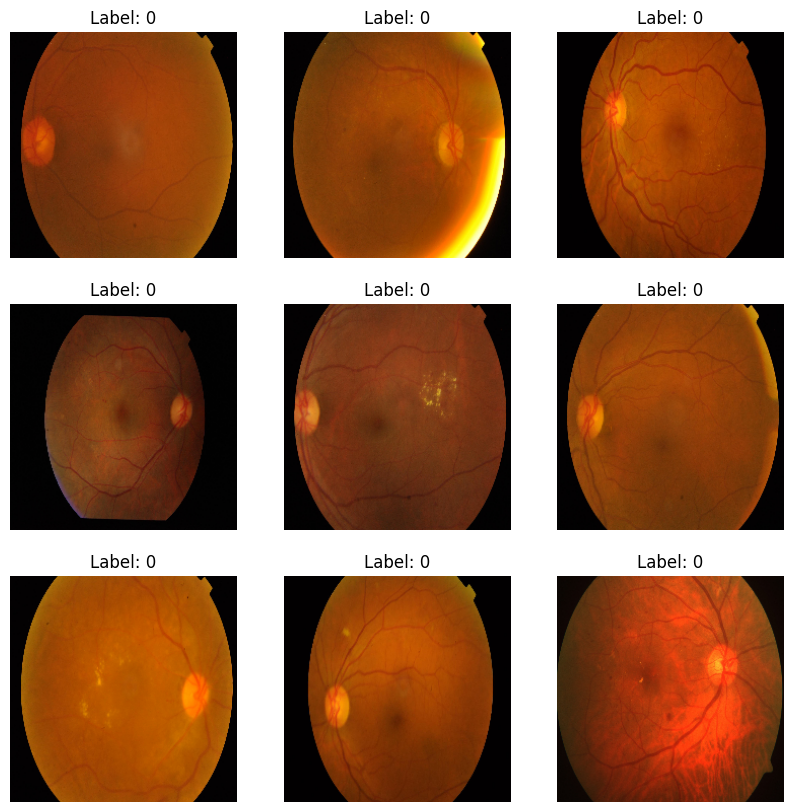

In [3]:
# Create an iterator for the dataset
iterator = iter(dataset)

# Create a 3x3 grid for displaying the images
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

# Display the first 9 images
for i in range(3):
    for j in range(3):
        image_batch, label_batch = next(iterator)
        axs[i, j].imshow(image_batch[0].numpy().astype("uint8"))  # Display the first image in the batch
        axs[i, j].set_title(f"Label: {label_batch[0]}")  # Assuming label_batch[0] is the label for the current image

# Remove axis labels
for ax in axs.flat:
    ax.axis("off")

plt.show()

In [4]:
# Create a dictionary that maps numerical labels to class names
class_names = {0:"Mild(Label 0)",1:"Moderate(Label 1)",2:"No_DR(Label 2)",3:"Proliferate_DR(Label 3)",4:"Severe(Label 4)"}

# Create an empty dictionary to store the counts for each class name
class_counts = {class_name: 0 for class_name in class_names.values()}

# Iterate through the dataset to count the occurrences of each class label
for image_batch, label_batch in dataset:
    for label in label_batch:
        class_name = class_names.get(int(label.numpy()), "Unknown Class")  # Convert label to class name
        class_counts[class_name] += 1

# Display the class counts
for class_name, count in class_counts.items():
    print(f"{class_name}: {count} images")


Mild(Label 0): 391 images
Moderate(Label 1): 999 images
No_DR(Label 2): 1805 images
Proliferate_DR(Label 3): 396 images
Severe(Label 4): 242 images


In [5]:
class_names = dataset.class_names
class_names

['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']

In [6]:
from imblearn.over_sampling import RandomOverSampler

# Extract features (X) and labels (y) from the 'dataset'
X = []
y = []
for images, labels in dataset:
    X.extend(images)
    y.extend(labels.numpy())

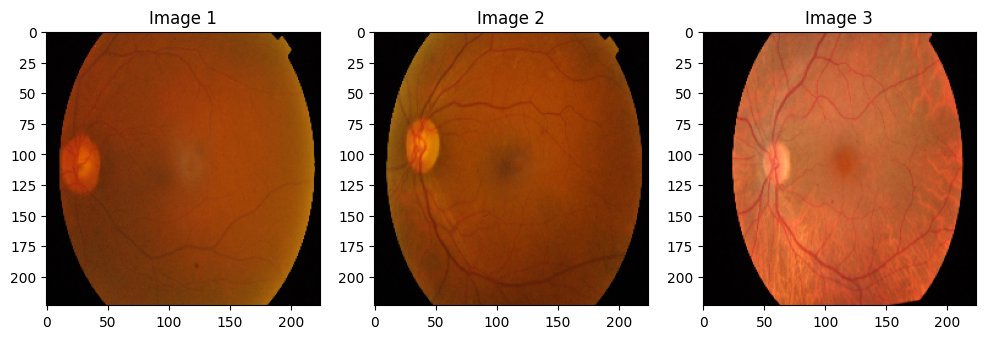

In [8]:
import matplotlib.pyplot as plt

# Assuming 'X' is a list of images
plt.figure(figsize=(12, 4))  # Adjust the figure size as needed

for i in range(3):
    plt.subplot(1, 3, i + 1)  # Create a subplot in a 1x3 grid
    plt.imshow(X[i].numpy().astype("uint8"))  # Display the i-th image
    plt.title(f"Image {i + 1}")

plt.show()

In [9]:
X = np.array(X)
y = np.array(y)

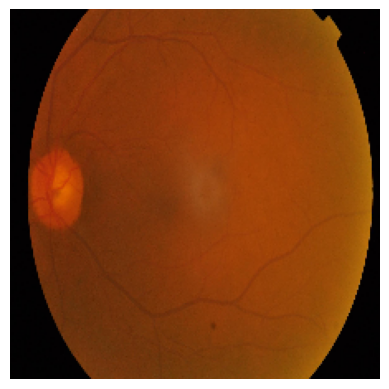

In [10]:
import matplotlib.pyplot as plt

# Assuming X[0] is a NumPy array containing the image data
plt.imshow(X[0].astype('uint8'))
plt.axis('off')  # Optional: Turn off axis labels
plt.show()

In [11]:
print(X.shape)
print(y.shape)

(3833, 224, 224, 3)
(3833,)


In [12]:
del dataset
del iterator

In [13]:
from sklearn.model_selection import train_test_split

# Split the dataset into training, validation, and test sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


print(len(X_train))
print(len(y_train))
print(len(X_val))
print(len(y_val))
print(len(X_test))
print(len(y_test))

2452
2452
767
767
614
614


In [14]:
print(X_train.shape)
print(y_train.shape)

(2452, 224, 224, 3)
(2452,)


In [15]:
from collections import Counter

# Assuming 'y_data' is your array of labels after oversampling
class_counts = Counter(y_train)

for class_label, count in class_counts.items():
    print(f"Class {class_label}: {count} samples")

Class 1: 643 samples
Class 2: 1161 samples
Class 3: 245 samples
Class 0: 246 samples
Class 4: 157 samples


In [16]:
from imblearn.over_sampling import RandomOverSampler

# Create a RandomOverSampler instance
ros = RandomOverSampler(random_state=42)

# Reshape the images to a 2D format
n_samples, height, width, channels = X_train.shape
X_2d = X_train.reshape((n_samples, -1))  # Flatten the images into 1D arrays
print(X_2d.shape)
print(y_train.shape)

# Apply random oversampling to X_train and y_train
X_train_resampled, y_train_resampled = ros.fit_resample(X_2d, y_train)

# Reshape the oversampled data to the original 4D format
X_train = X_train_resampled.reshape(-1, height, width, channels)
y_train=y_train_resampled

print(X_train.shape)
print(y_train.shape)


(2452, 150528)
(2452,)
(5805, 224, 224, 3)
(5805,)


In [17]:
from collections import Counter

# Assuming 'y_train_resampled' is your array of labels after oversampling
class_counts = Counter(y_train_resampled)

for class_label, count in class_counts.items():
    print(f"Class {class_label}: {count} samples")


Class 1: 1161 samples
Class 2: 1161 samples
Class 3: 1161 samples
Class 0: 1161 samples
Class 4: 1161 samples


In [18]:
print(X_train.shape)
print(y_train.shape)

(5805, 224, 224, 3)
(5805,)


In [19]:
print(len(X_train))
print(len(X_val))
print(len(X_test))
print(len(y_train))
print(len(y_val))
print(len(y_test))

5805
767
614
5805
767
614


In [20]:
from tensorflow.keras.utils import to_categorical

In [21]:
y_train = to_categorical(y_train, num_classes= 5)
y_test = to_categorical(y_test, num_classes= 5)
y_val = to_categorical(y_val, num_classes= 5)

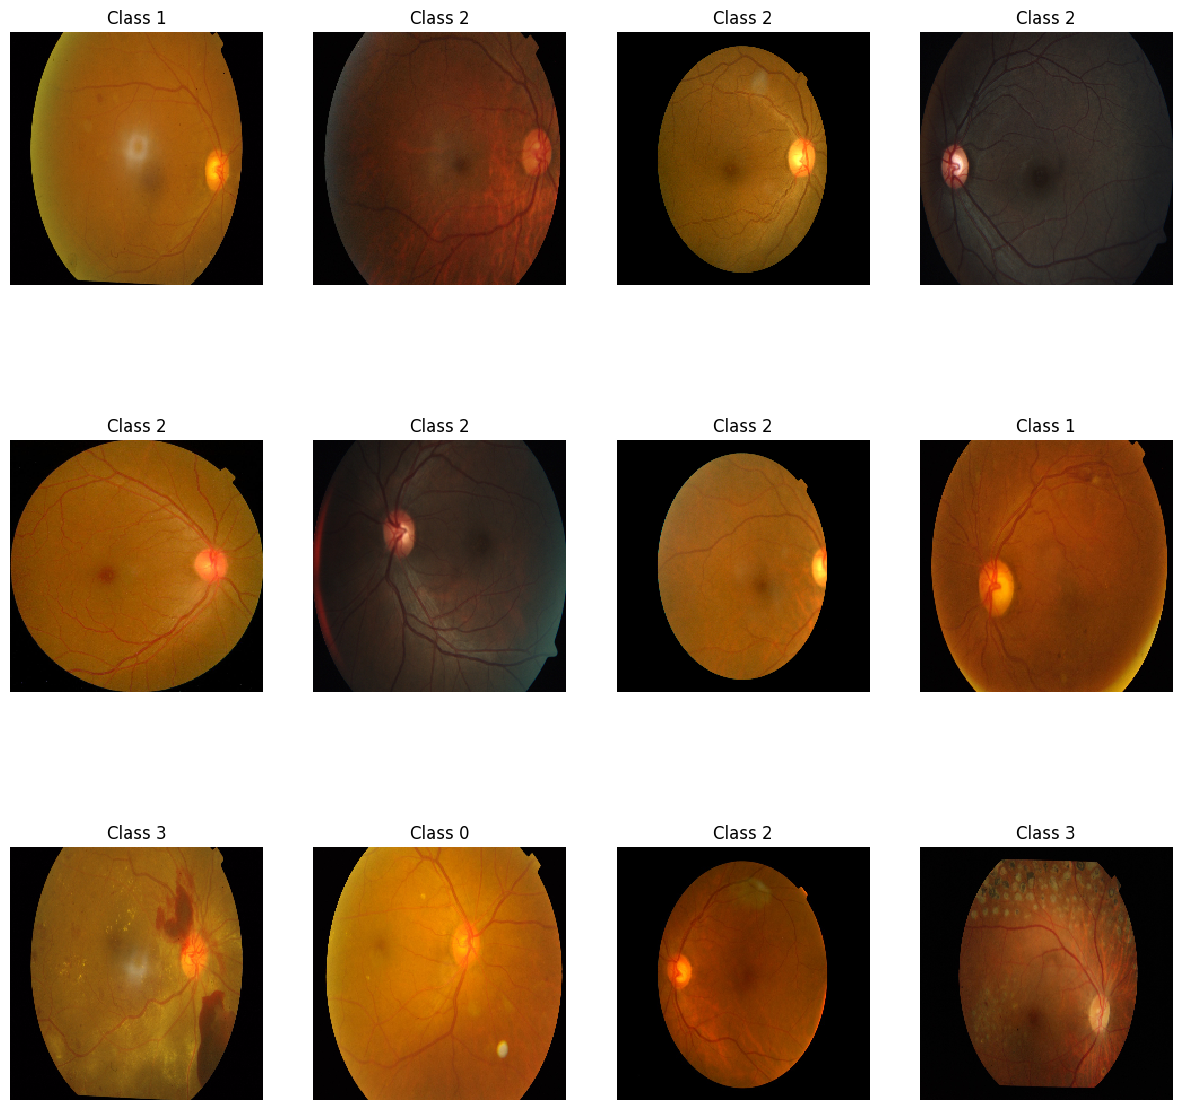

In [22]:
w = 60
h = 40
fig = plt.figure(figsize=(15, 15))
columns = 4
rows = 3

for i in range(1, columns * rows + 1):
    ax = fig.add_subplot(rows, columns, i)
    idx = i - 1  # Adjust the index to access the correct image and label
    
    if np.argmax(y_train[idx]) == 0:
        ax.set_title('Class 0')
    elif np.argmax(y_train[idx]) == 1:
        ax.set_title('Class 1')
    elif np.argmax(y_train[idx]) == 2:
        ax.set_title('Class 2')
    else:
        ax.set_title('Class 3')
    
    # Display the image corresponding to the current label
    plt.imshow(X_train[idx].astype('uint8'), interpolation='nearest', cmap='gray')  # Assuming grayscale images
    plt.axis('off')  # Optionally, turn off axis labels

plt.show()


In [23]:
del X
del y
del X_train_resampled
del y_train_resampled



In [24]:
import json
import math
import os

import cv2
from PIL import Image
import numpy as np
from keras import layers
from tensorflow.keras.applications import Xception,VGG16,InceptionV3,EfficientNetB0,EfficientNetB3,DenseNet121,MobileNet
from keras.callbacks import Callback, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, accuracy_score
import scipy
from tqdm import tqdm
import tensorflow as tf
from keras import backend as K
import gc
from functools import partial
from sklearn import metrics
from collections import Counter
import json
import itertools


%matplotlib inline

In [25]:
BATCH_SIZE = 32

# Using original generator
train_generator = ImageDataGenerator(
        zoom_range=2,  # set range for random zoom
        rotation_range = 90,
        horizontal_flip=True,  
        vertical_flip=True,
 )

In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [27]:
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D, Dropout, BatchNormalization, Flatten, Dense

def build_model(backbone, lr=1e-4):
    model = Sequential()
      # Adding the efficient net model
    
    # Add Conv2D and MaxPool2D layers twice

    
    #model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
    #model.add(MaxPool2D(pool_size=(1, 1)))
    
    #model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
    #model.add(MaxPool2D(pool_size=(1, 1)))
    
    #model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
    #model.add(MaxPool2D(pool_size=(1, 1)))
    
    #model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
    #model.add(MaxPool2D(pool_size=(1, 1)))
    
    #model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
    #model.add(MaxPool2D(pool_size=(1, 1)))
    
   
    
#     model.add(GlobalAveragePooling2D())
   # model.add(Dropout(0.2))
    '''
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(5, activation='softmax'))
    '''
    
    
    
    from tensorflow.keras import regularizers

    # Define the regularization strength
    regularization_strength = 0.01


    for layer in model.layers:
        layer.trainable = False

    model.add(backbone)

    # Flatten layer
    model.add(Flatten())

    # Dense layer with regularization
    model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(regularization_strength)))

    # Dropout layer
    model.add(Dropout(0.2))

    # Dense layer with regularization
    model.add(Dense(5, activation='softmax', kernel_regularizer=regularizers.l2(regularization_strength)))

    
    
    
    model.compile(
        loss='categorical_crossentropy',
        optimizer=Adam(lr=lr),
        metrics=['accuracy']
    )

    return model


In [28]:
K.clear_session()
gc.collect()
net = MobileNet(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
    
)

model = build_model(net ,lr = 1e-4)
model.summary()

17225924/17225924 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 512)               25690624  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 28,922,053
Trainable params: 28,900,165
Non

In [29]:
learn_control = ReduceLROnPlateau(monitor='val_acc', patience=5,
                                  verbose=2,factor=0.2, min_lr=1e-7)

# Checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=2, save_best_only=True, mode='max')

In [30]:
epoch = 35

In [31]:
history = model.fit( train_generator.flow(X_train, y_train, batch_size=BATCH_SIZE), 
                    steps_per_epoch=X_train.shape[0] / BATCH_SIZE,
                    epochs=epoch, 
                    validation_data=(X_val, y_val), callbacks=[learn_control, checkpoint] )

Epoch 1/35
181/181 [==============================] - 81s 340ms/step - loss: 10.3536 - accuracy: 0.3604 - val_loss: 3.4775 - val_accuracy: 0.6819 - lr: 0.0010
Epoch 2/35
181/181 [==============================] - 60s 329ms/step - loss: 2.5641 - accuracy: 0.5022 - val_loss: 1.6113 - val_accuracy: 0.5841 - lr: 0.0010
Epoch 3/35
181/181 [==============================] - 60s 333ms/step - loss: 1.5054 - accuracy: 0.5363 - val_loss: 0.9929 - val_accuracy: 0.7145 - lr: 0.0010
Epoch 4/35
181/181 [==============================] - 60s 330ms/step - loss: 1.2119 - accuracy: 0.5700 - val_loss: 0.8103 - val_accuracy: 0.7627 - lr: 0.0010
Epoch 5/35
181/181 [==============================] - 60s 332ms/step - loss: 1.1282 - accuracy: 0.5922 - val_loss: 0.7055 - val_accuracy: 0.7692 - lr: 0.0010
Epoch 6/35
181/181 [==============================] - 60s 331ms/step - loss: 1.0890 - accuracy: 0.6014 - val_loss: 0.7759 - val_accuracy: 0.7275 - lr: 0.0010
Epoch 7/35
181/181 [==============================]

<Axes: >

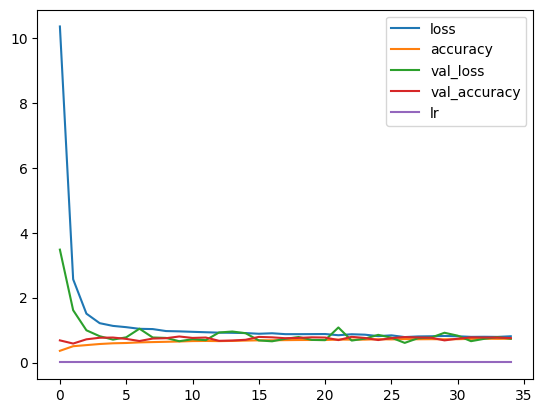

In [32]:
with open('history.json', 'w') as f:
    json.dump(str(history.history), f)
history_df = pd.DataFrame(history.history)
history_df.plot()

<Axes: >

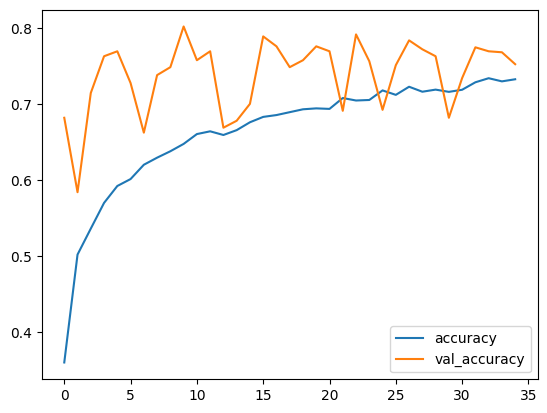

In [33]:
history_df = pd.DataFrame(history.history)
history_df[['accuracy', 'val_accuracy']].plot()

<Axes: >

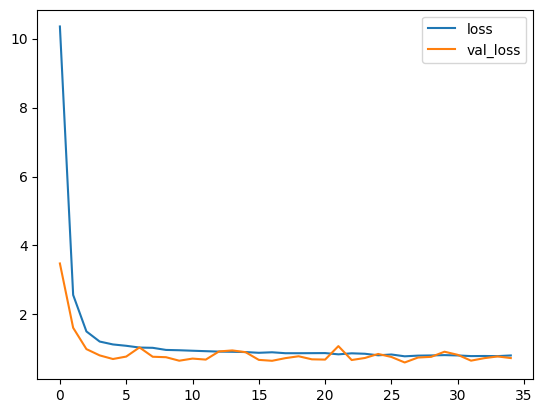

In [34]:
history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot()

In [35]:
print("Evaluate on test data")
results = model.evaluate(X_test, y_test, batch_size=32)
print("test loss, test acc:", results)

Evaluate on test data
20/20 [==============================] - 1s 47ms/step - loss: 0.7314 - accuracy: 0.7720
test loss, test acc: [0.7314296364784241, 0.7719869613647461]


In [36]:
#class_name=['0','1','2','3','4']
class_name=['Mild','Moderate','No_DR','Proliferate_DR','Severe']
y_pred_probabilities = model.predict(X_test)
y_pred = np.argmax(y_pred_probabilities, axis=1)
y_true = np.argmax(y_test, axis=1)
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()

20/20 [==============================] - 1s 34ms/step


In [37]:
con_mat_df = pd.DataFrame(con_mat,
                     index = class_name, 
                     columns = class_name)

In [38]:
con_mat_df

,Mild,Moderate,No_DR,Proliferate_DR,Severe
Mild,18,17,8,6,1
Moderate,5,109,4,14,30
No_DR,1,1,285,0,1
Proliferate_DR,2,13,1,37,24
Severe,0,7,0,5,25


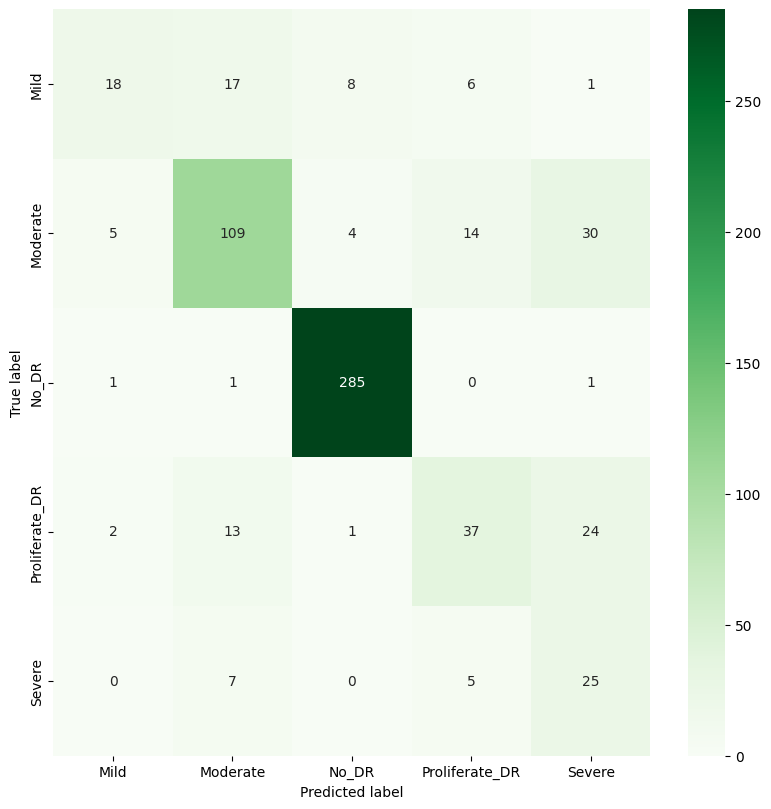

In [39]:
import seaborn as sns
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Greens, fmt='.0f')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.36      0.47        50
           1       0.74      0.67      0.71       162
           2       0.96      0.99      0.97       288
           3       0.60      0.48      0.53        77
           4       0.31      0.68      0.42        37

    accuracy                           0.77       614
   macro avg       0.66      0.64      0.62       614
weighted avg       0.79      0.77      0.77       614

